**The contribution of R&D growth and investments on the growth of value added (VA) in economic industries.**

Leo Anuchin, CKDU36

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import ipywidgets
from ipywidgets import widgets
from ipywidgets import interact

import warnings



In [ ]:
warnings.filterwarnings("ignore")

**Preprocessing data**

In [ ]:
df = pd.read_csv('/content/ForNotebook.csv',sep=',')

In [ ]:
df.head(5)

,Country,Industry,ValueAdded,M_total_consumed,VA_M_cor,Va_GFCC_cor,GROWTH_FACTOR,SHARE,DEVELOPMENT
0,ARG,A01_02,531148.8815,3886.0693,0.9068,0.7097,0.0926,0.0640,Emerging and Developing Economies
1,ARG,A03,24269.0366,543.8862,0.8582,-0.4790,0.0227,0.0029,Emerging and Developing Economies
2,ARG,B05_06,205587.3748,6458.6305,-0.6629,0.9712,0.3201,0.0248,Emerging and Developing Economies
3,ARG,B07_08,59168.4147,942.4609,0.7862,0.0721,0.0161,0.0071,Emerging and Developing Economies
4,ARG,B09,50645.3408,3183.2776,0.3452,-0.7450,0.2177,0.0061,Emerging and Developing Economies


In [ ]:
df.drop(columns=['ValueAdded','M_total_consumed'], inplace=True)

In [ ]:
df['DEVELOPED'] = df['DEVELOPMENT'].apply(lambda x: 1 if x == 'Advanced Economies' else 0)


In [ ]:
df.drop(columns=['DEVELOPMENT'], inplace=True)

In [ ]:
df.head(5)

,Country,Industry,VA_M_cor,Va_GFCC_cor,GROWTH_FACTOR,SHARE,DEVELOPED
0,ARG,A01_02,0.9068,0.7097,0.0926,0.0640,0
1,ARG,A03,0.8582,-0.4790,0.0227,0.0029,0
2,ARG,B05_06,-0.6629,0.9712,0.3201,0.0248,0
3,ARG,B07_08,0.7862,0.0721,0.0161,0.0071,0
4,ARG,B09,0.3452,-0.7450,0.2177,0.0061,0


Let's delete countries "tax-heavens" and "offshores": CYP, SGP, HKG, LUX, MLT

In [ ]:
df_filtered = df[~df['Country'].isin(['CYP', 'SGP', 'HKG', 'LUX', 'MLT', 'IRL'])]

In [ ]:
df_filtered = df_filtered.dropna()

In [ ]:

scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
numerical_features = ['VA_M_cor', 'Va_GFCC_cor', 'GROWTH_FACTOR', 'SHARE']
scaler_minmax.fit(df_filtered[numerical_features])
df_filtered[numerical_features] = scaler_minmax.transform(df_filtered[numerical_features])

In [ ]:
df_filtered.head(5)

,Country,Industry,VA_M_cor,Va_GFCC_cor,GROWTH_FACTOR,SHARE,DEVELOPED
0,ARG,A01_02,0.904115,0.693154,-0.992117,-0.707696,0
1,ARG,A03,0.852567,-0.564596,-0.998080,-0.986755,0
2,ARG,B05_06,-0.760819,0.969844,-0.972708,-0.886732,0
3,ARG,B07_08,0.776199,0.018517,-0.998644,-0.967573,0
4,ARG,B09,0.308443,-0.846048,-0.981444,-0.972140,0


In [ ]:
developed = ['DEVELOPED']

NOW WE CHOOSE THE INDUSTRY TO ANALYSE

In [ ]:
unique_labels = df_filtered['Industry'].unique()
label_dropdown = widgets.Dropdown(
    options=unique_labels,
    description='Choose Label:',
    disabled=False,
)
def handle_selection(chosen_label):
  print(f"Selected Label: {chosen_label}")
  global label
  label = chosen_label
interact(handle_selection, chosen_label=label_dropdown)

# filt_df = df_filtered[df_filtered['Industry'] == label].copy()
# filt_df = filt_df.drop(['Industry'], axis = 1)

interactive(children=(Dropdown(description='Choose Label:', options=('A01_02', 'A03', 'B05_06', 'B07_08', 'B09…

<function __main__.handle_selection(chosen_label)>

In [ ]:
filt_df = df_filtered[df_filtered['Industry'] == label].copy()
filt_df.head(5)

,Country,Industry,VA_M_cor,Va_GFCC_cor,GROWTH_FACTOR,SHARE,DEVELOPED
12,ARG,C22,0.973908,0.858322,-0.992569,-0.957981,0
58,AUS,C22,0.850552,0.977357,-0.978510,-0.982644,1
104,AUT,C22,0.942193,0.875886,-0.983031,-0.964375,1
150,BEL,C22,0.694315,0.931013,-0.985309,-0.971226,1
196,BGD,C22,0.955134,0.987726,-0.981641,-0.977620,0


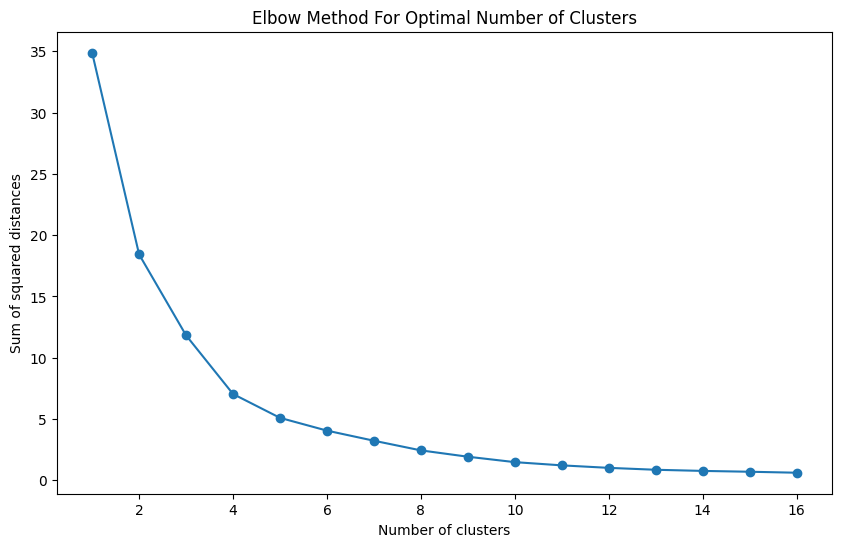

In [ ]:
sse = []
for k in range(1, 17):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filt_df[numerical_features + developed])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 17), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

Now, we can choose K for k-mean method

In [ ]:
k_labels = [1,2,3,4,5,6,7,8,9,10,11,12]
k_label_dropdown = widgets.Dropdown(
    options=k_labels,
    description='Choose Label:',
    disabled=False,
)
def handle_selection(chosen_label):
  print(f"Selected Label: {chosen_label}")
  global k_label
  k_label = chosen_label
interact(handle_selection, chosen_label=k_label_dropdown)

interactive(children=(Dropdown(description='Choose Label:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), v…

<function __main__.handle_selection(chosen_label)>

In [ ]:
kmeans = KMeans(n_clusters=k_label, random_state=10)
filt_df['Cluster'] = kmeans.fit_predict(filt_df[numerical_features + developed])


In [ ]:
filt_df[['Country','Cluster']]

,Country,Cluster
12,ARG,2
58,AUS,1
104,AUT,1
150,BEL,1
196,BGD,2
...,...,...
3232,TUN,2
3278,TUR,2
3324,TWN,1
3416,USA,1


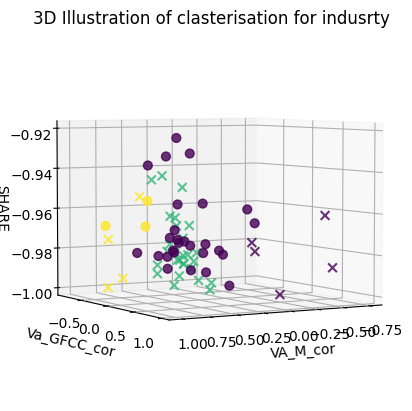

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define markers based on condition
filt_df['Marker_Shape'] = filt_df['DEVELOPED'].apply(lambda x: 'o' if x == 1 else 'x')

# Scatter plot for each marker shape
for marker in filt_df['Marker_Shape'].unique():
    subset = filt_df[filt_df['Marker_Shape'] == marker]
    ax.scatter(subset['VA_M_cor'], subset['Va_GFCC_cor'], subset['SHARE'], c=subset['Cluster'], cmap='viridis', marker=marker, s=40, alpha=0.8)
ax.set_xlabel('VA_M_cor')
ax.set_ylabel('Va_GFCC_cor')
ax.set_zlabel('SHARE')
ax.set_title('3D Illustration of clasterisation for indusrty')

ax.view_init(elev=4, azim=60)  # Example: Elevation of 15 degrees, Azimuth of -60 degrees

plt.show()

In [ ]:
numerical_cluster_centers = kmeans.cluster_centers_[:, :len(numerical_features)]
inverse_numerical_centers = scaler_minmax.inverse_transform(numerical_cluster_centers)
cluster_centers_df = pd.DataFrame(inverse_numerical_centers, columns=numerical_features)

print("Cluster Centers (in original scale):")
print(cluster_centers_df)

Cluster Centers (in original scale):
   VA_M_cor  Va_GFCC_cor  GROWTH_FACTOR     SHARE
0 -0.136280     0.747400       0.208420  0.004540
1  0.738341     0.718141       0.131463  0.007348
2  0.864904     0.824137       0.133470  0.005837
3  0.767200    -0.315343       0.066029  0.006000


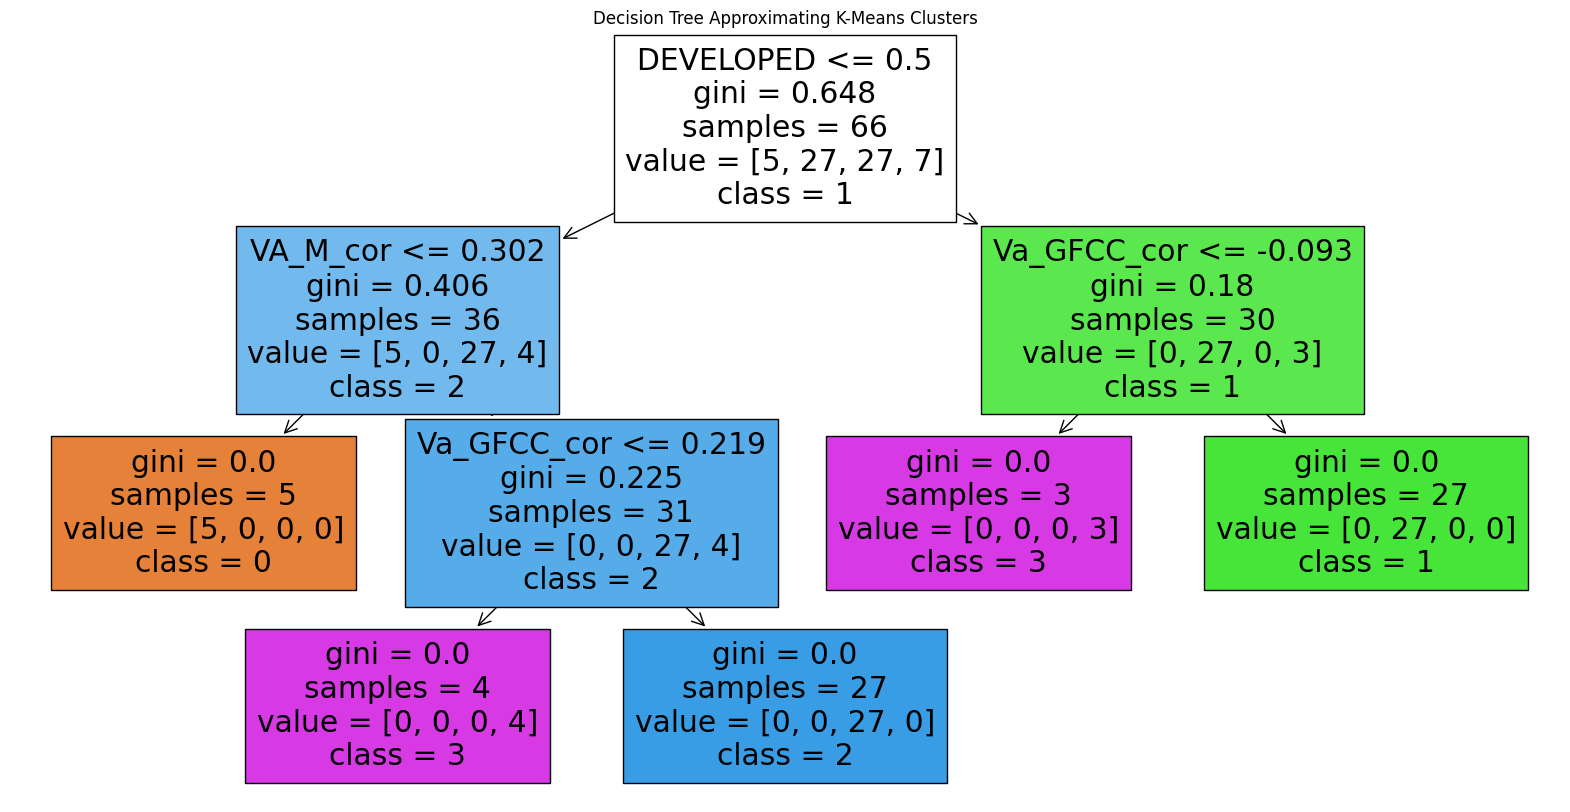

In [ ]:
# Train a decision tree classifier to predict the clusters
X = filt_df[numerical_features + developed]
y = filt_df['Cluster']
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=numerical_features + list(developed), class_names=[str(i) for i in range(k_label)], filled=True)
plt.title("Decision Tree Approximating K-Means Clusters")
plt.show()